# Classificação de imagens

Lista de modelos disponíveis:

[https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights](https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights)

In [13]:
import os
import random
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
from torchvision.models.efficientnet import (efficientnet_v2_s, 
                                        EfficientNet_V2_S_Weights)

# Carrega a rede e os respectivos pesos pré-treinados
weights = EfficientNet_V2_S_Weights.DEFAULT
model = efficientnet_v2_s(weights=weights)
model.eval()

# Categorias que a rede aceita
categories = weights.meta["categories"]
# Funções de pré-processamento para as imagens
preprocess = weights.transforms()
print(categories)

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

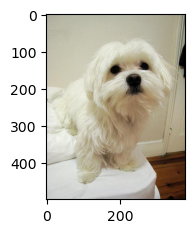

In [2]:
img = read_image("imagens/n02085936_Maltese_dog.jpeg")
# No Pytorch a primeira dimensão representa as cores, o que é diferente do matplotlib, que considera que a última 
# dimensão possui as cores. O permute transfere as cores para a última dimensão
plt.imshow(img.permute(1, 2, 0))

### Aplicação da CNN na imagem para gerar 1000 valores

In [3]:
img[None].shape

torch.Size([1, 3, 500, 375])

In [4]:
# O modelo trabalha com batches de imagens, isto é, ele espera que a CNN seja aplicada em um conjunto 
# de imagens ao invés de uma única imagem. Como estamos trabalhando apenas com uma imagem, criamos 
# um batch contendo apenas uma imagem. Também convertemos a imagem para float.
batch = img[None].float()

# Para aplicar a CNN na imagem, é importante utilizar o contexto "with torch.no_grad():" para evitar
# computações desnecessárias, mas não daria erro se não utilizássemos o contexto.
with torch.no_grad():
    prediction = model(batch)
print(prediction)

tensor([[-1.2633e+05, -8.8022e+04, -5.4987e+04, -4.6780e+03,  6.1221e+03,
         -3.9251e+04, -1.2030e+04, -3.4501e+04, -4.3882e+04, -4.7016e+04,
         -1.8106e+04,  5.3240e+03,  4.1647e+04,  4.2068e+04,  6.7523e+04,
         -5.3405e+04,  1.4500e+04,  2.4370e+04,  3.7902e+04,  5.6718e+04,
          6.7557e+04,  2.9003e+04,  8.1369e+04,  9.9690e+04,  1.0802e+05,
          5.1592e+04,  1.3796e+04,  2.6107e+03, -2.0671e+04,  5.0392e+03,
          5.0223e+04,  9.3026e+04,  3.6687e+04, -1.0790e+05, -1.1228e+05,
         -1.6882e+04,  9.8957e+03, -8.2594e+04, -1.3055e+04,  1.0112e+04,
          3.8504e+04, -1.2160e+05,  4.4317e+04,  7.6186e+04, -3.1342e+04,
         -7.2779e+04, -4.4586e+04,  2.1812e+04, -9.8674e+04, -2.1742e+04,
          2.8465e+04, -7.7651e+04, -3.1866e+04, -6.5746e+04, -6.3632e+04,
         -6.4677e+04, -9.1076e+04, -9.1412e+04,  5.2205e+04,  1.1852e+04,
         -2.3811e+04,  2.1451e+04, -4.6341e+04, -1.0067e+05, -3.8350e+04,
         -3.5675e+04, -8.2922e+04, -1.

In [5]:
# Antes de enviar a imagem para a rede, ela precisa passar por algumas
# transformações:
preprocess

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

### Cálculo das probabilidades da imagem pertencer a cada categoria

In [6]:
def print_prediction(categories, prediction):
    '''Função para imprimir as categorias e as respectivas probabilidades'''

    s_ind = torch.argsort(prediction, descending=True)
    for i in s_ind:
        print(f'{categories[i]}: {prediction[i].item():.2}')
        
batch = preprocess(img)[None]
with torch.no_grad():
    prediction = model(batch)[0].softmax(0)
print_prediction(categories, prediction)

Maltese dog: 0.75
Lhasa: 0.0063
Japanese spaniel: 0.002
Shih-Tzu: 0.0019
West Highland white terrier: 0.0019
Sealyham terrier: 0.0018
Tibetan terrier: 0.0012
Yorkshire terrier: 0.0011
Pekinese: 0.001
toy poodle: 0.00094
plastic bag: 0.00084
wig: 0.00074
jersey: 0.00073
Dandie Dinmont: 0.0007
papillon: 0.0007
Angora: 0.00067
miniature poodle: 0.00067
kite: 0.00065
Norfolk terrier: 0.00065
Persian cat: 0.0006
American Staffordshire terrier: 0.00059
clumber: 0.00056
abaya: 0.00055
Old English sheepdog: 0.00054
Great Pyrenees: 0.00051
garden spider: 0.0005
Granny Smith: 0.0005
bald eagle: 0.00048
electric ray: 0.00047
barn spider: 0.00046
green mamba: 0.00046
breastplate: 0.00045
lakeside: 0.00044
boxer: 0.00044
amphibian: 0.00044
Samoyed: 0.00044
earthstar: 0.00044
corkscrew: 0.00044
pencil sharpener: 0.00044
geyser: 0.00043
Band Aid: 0.00043
white stork: 0.00043
ptarmigan: 0.00043
Australian terrier: 0.00043
jellyfish: 0.00043
Weimaraner: 0.00042
hard disc: 0.00042
black and gold garden 

In [7]:
# Categoria mais provável
print('Categoria: ', categories[prediction.argmax()])

Categoria:  Maltese dog


# Leitura e classificação de diversas imagens 

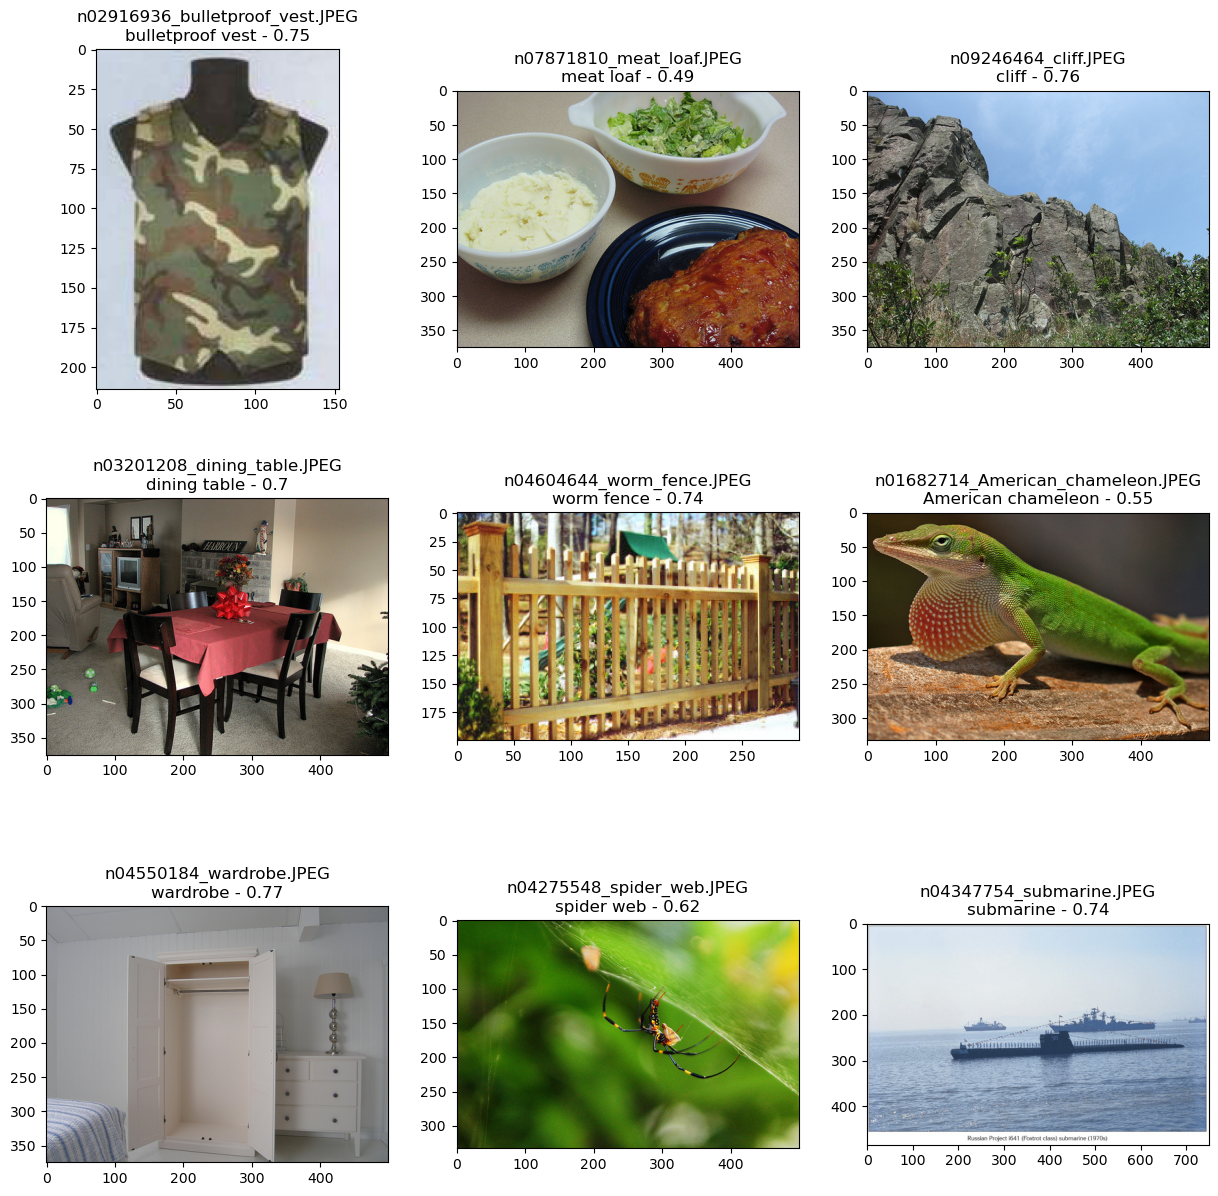

In [8]:
files = os.listdir('imagens')
plt.figure(figsize=[15, 15])
for i in range(9):
    file_id = random.randint(0, len(files)-1)
    filename = files[file_id]
    img = read_image(f"imagens/{filename}")
    # Se a imagem possuir apenas 1 canal, replicamos o canal 3 vezes
    if img.shape[0]==1:
        img = torch.cat((img, img, img))

    batch = preprocess(img)[None]
    with torch.no_grad():
        prediction = model(batch).squeeze().softmax(0)
    cat = prediction.argmax()

    plt.subplot(3, 3, i+1)
    plt.imshow(img.permute(1, 2 ,0))
    plt.title(f'{filename}\n{categories[cat]} - {prediction[cat]:.2}');

# Visualização de algumas filtragens utilizadas pela rede neural

In [9]:
# As principais camadas da rede são convoluções, por exemplo:
model.features[0][0]

Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

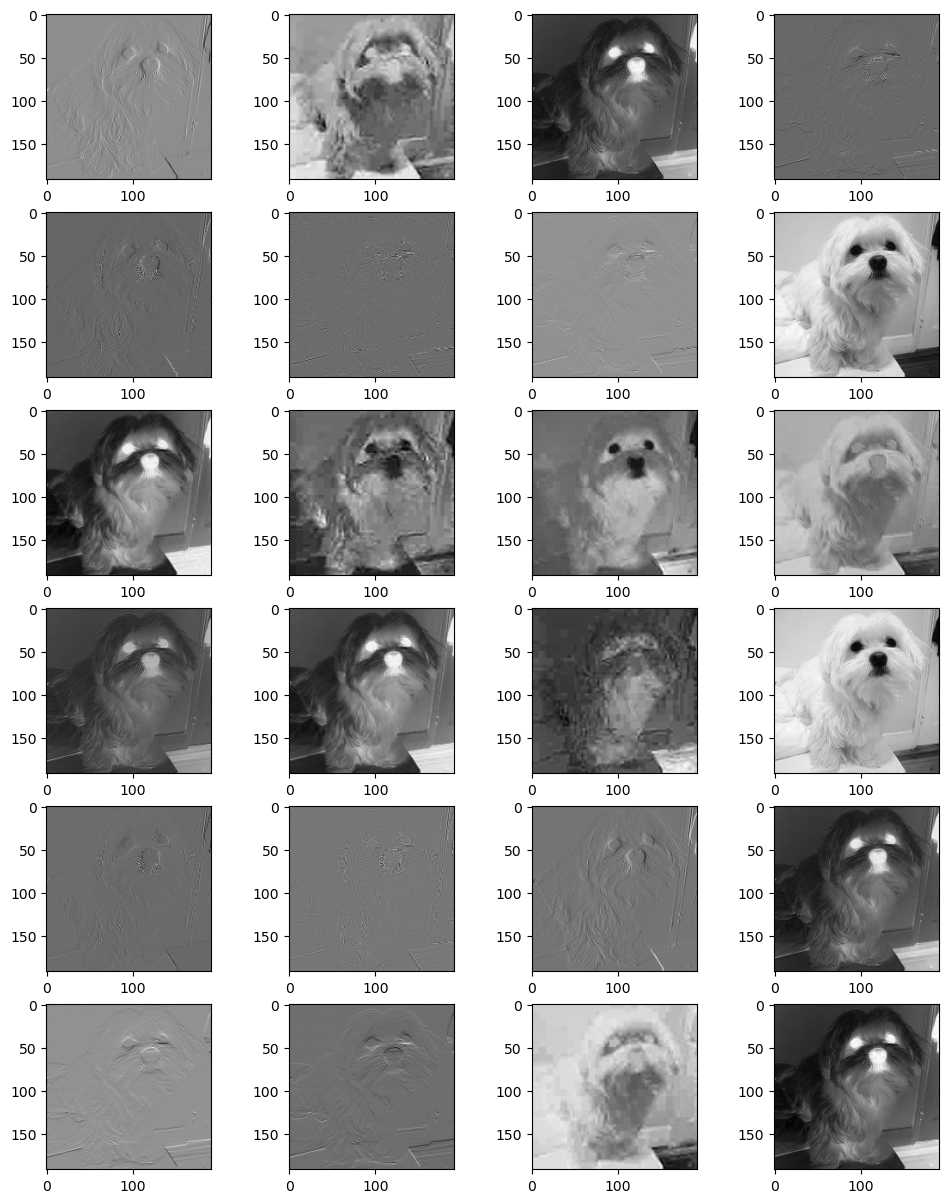

In [10]:
img = read_image("imagens/n02085936_Maltese_dog.jpeg")
filt = model.features[0][0]
batch = preprocess(img)[None]
with torch.no_grad():
    filt_imgs = filt(batch)[0]

plt.figure(figsize=[12, 15])
for i in range(24):
    plt.subplot(6, 4, i+1)
    plt.imshow(filt_imgs[i], 'gray')

# Visualização de alguns filtros utilizados pela rede neural

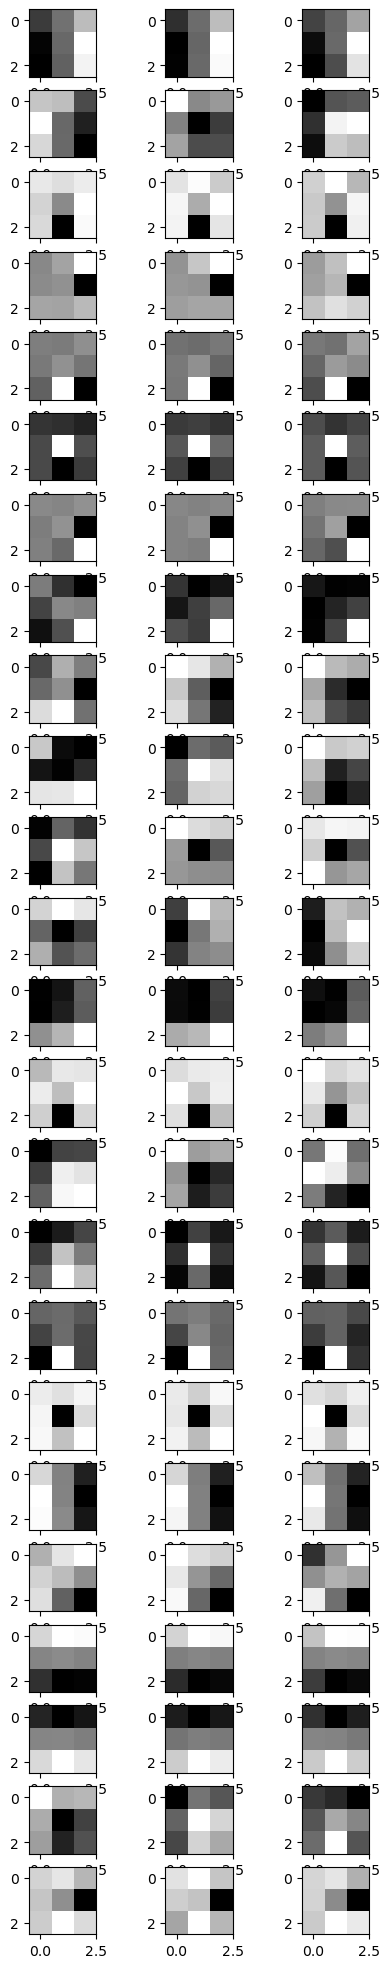

In [11]:
filters = filt.weight.detach()

plt.figure(figsize=[5, 25])
for i in range(24):
    plt.subplot(24, 3, 3*i+1)
    plt.imshow(filters[i][0], 'gray')
    plt.subplot(24, 3, 3*i+2)
    plt.imshow(filters[i][1], 'gray')
    plt.subplot(24, 3, 3*i+3)
    plt.imshow(filters[i][2], 'gray')

### Transformação da rede em um extrator de atributos

In [12]:
# A última camada da rede é transformada em uma função identidade
model.classifier = torch.nn.Identity()
features = model(batch)[0].detach()
# Temos 1280 atributos
print(features.shape)
print(features)

torch.Size([1280])
tensor([-0.1919, -0.1275, -0.0497,  ..., -0.1389, -0.1773, -0.1822])
